In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option("display.max_rows", 999)
import sqlite3
conn = sqlite3.connect('social.db')



In [3]:
# some handy functions to use along widgets
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets
# defining some widgets

In [4]:
userId = widgets.Text(  value='23', description='usuario', )

### Os dados foram analisados com base em um usuaário padrão

In [5]:
usuario_padrao=int(userId.value)

### Formatação dos dados
**user**: id do usuário

**slot**: vivisão do tempo em slots de 15 minutos, sendo que o primeiro slot correpode de 00:00 até 00:15

**day week**: dia da semana: de domingo até sabado

**weekend**: informar se o registo conrrepode a um dia da semana ou ao final de semana

**day**: dia

**month**: mês

**conversation**: informa se o usuário conversou ou nao durante 

In [6]:
pd.read_sql_query("SELECT * from social", conn)

,Id,user,slot,dayWeek,weekend,day,month,conversation,line,activity_stationary,activity_Walking,activity_running,activity_silence,activity_voice,activity_noise,dark,audio_silence,audio_voice,audio_noise
0,1,0,0,3,0,27,3,0,0,1.0,NaN,NaN,None,None,None,None,1.0,NaN,NaN
1,2,0,1,3,0,27,3,0,0,1.0,NaN,NaN,None,None,None,None,1.0,NaN,NaN
2,3,0,2,3,0,27,3,0,0,1.0,NaN,NaN,None,None,None,None,1.0,NaN,NaN
3,4,0,3,3,0,27,3,1,1,1.0,NaN,NaN,None,None,None,None,1.0,NaN,NaN
4,5,0,4,3,0,27,3,0,0,1.0,NaN,NaN,None,None,None,None,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259867,259868,59,91,5,0,31,5,1,8169,NaN,NaN,NaN,None,None,None,None,NaN,NaN,NaN
259868,259869,59,92,5,0,31,5,1,8169,NaN,NaN,NaN,None,None,None,None,NaN,NaN,NaN
259869,259870,59,93,5,0,31,5,1,8169,NaN,NaN,NaN,None,None,None,None,NaN,NaN,NaN
259870,259871,59,94,5,0,31,5,0,0,NaN,NaN,NaN,None,None,None,None,NaN,NaN,NaN


### Verifica os slots que contem mais registro de conversação do usuario padrão

In [7]:
sql='''select 
    slot, 
    (slot/4) as 'hora',
    (slot%4)*15 as 'inic',
    ((slot%4)*15)+15 as 'fim', 
    count(1) as 'quantidade'
from social
where conversation=1  and user={}
group by slot
order by count(1) desc
'''.format(usuario_padrao)
dataTrain=pd.read_sql_query(sql, conn)

In [8]:
dataTrain

,slot,hora,inic,fim,quantidade
0,52,13,0,15,33
1,51,12,45,60,30
2,49,12,15,30,29
3,54,13,30,45,29
4,70,17,30,45,29
5,53,13,15,30,28
6,55,13,45,60,27
7,56,14,0,15,27
8,67,16,45,60,27
9,68,17,0,15,27


### Verifica os slots contem a menor quantidade de slots de conversação

In [9]:
sql='''select 
    slot, (slot/4) as 'hora',
    (slot%4)*15 as 'inic',
    ((slot%4)*15)+15 as 'fim', 
    count(1) as 'quantidade'
from social
where conversation=0  and user={}
group by slot
order by count(1) desc
'''.format(usuario_padrao)
d=pd.read_sql_query(sql, conn)


In [10]:
d

,slot,hora,inic,fim,quantidade
0,5,1,15,30,58
1,6,1,30,45,58
2,7,1,45,60,58
3,8,2,0,15,58
4,9,2,15,30,58
5,11,2,45,60,58
6,92,23,0,15,58
7,93,23,15,30,58
8,94,23,30,45,58
9,95,23,45,60,58


### Mostra os dias que apresentaram mais interações

In [13]:
sql='''select 
    month,
    day,
    count(1) as 'quantidade'
from social
where conversation=0
group by month,day
order by count(1) desc
'''
d=pd.read_sql_query(sql, conn)


In [14]:
d

,month,day,quantidade
0,4,16,3089
1,4,21,3083
2,4,7,2954
3,4,13,2868
4,4,15,2862
5,3,31,2852
6,4,3,2848
7,5,14,2836
8,4,9,2824
9,5,6,2809


## Mostra a quantidade de registros de conversação por hora do usuario

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 <a list of 7 Text xticklabel objects>)

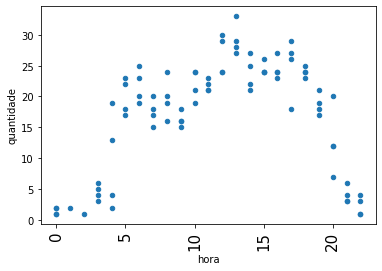

In [15]:
data = pd.concat([dataTrain['hora'], dataTrain['quantidade']], axis=1)
data.plot.scatter(x='hora', y='quantidade')
plt.xticks(rotation='90',fontsize=15)


## Mostra a quantidade de registros de conversação por slots do usuário padrao

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85]), <a list of 86 Text xticklabel objects>)

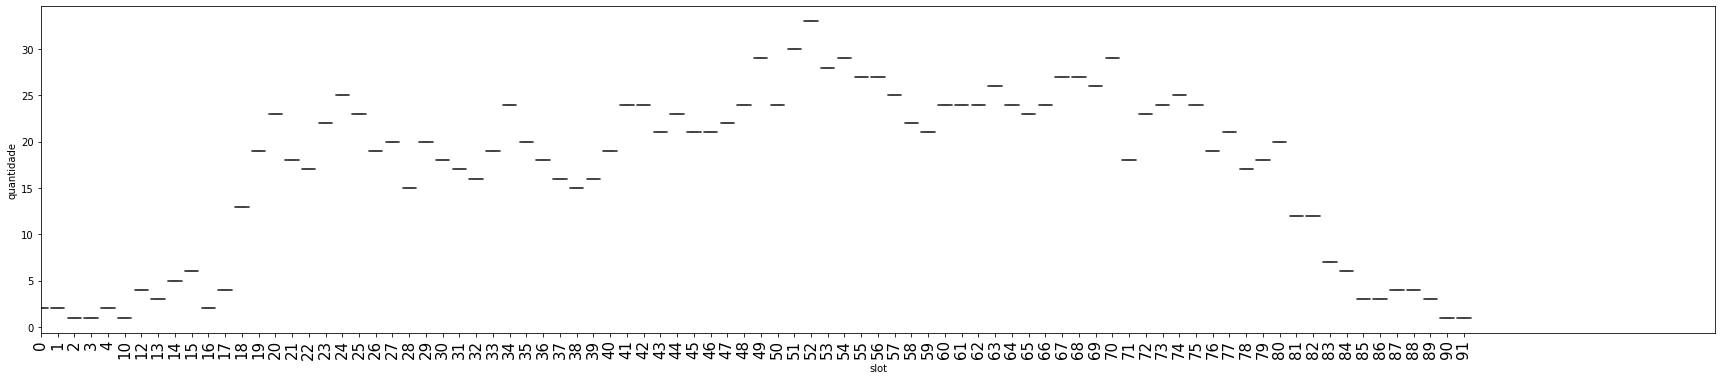

In [16]:
#box plot overallqual/saleprice
 
data = pd.concat([dataTrain['slot'], dataTrain['quantidade']], axis=1)
f, ax = plt.subplots(figsize=(30, 6))
plt.xticks(rotation='90',fontsize=55)
fig = sns.boxplot(x='slot', y="quantidade", data=data)
fig.axis(xmin=0, xmax=100);
plt.xticks(rotation='90',fontsize=15)


### Mostrar a quantidade de interações e não interações para o usuario padrao

In [17]:
sql='''select 
    conversation, 
    count(1) as 'quantidade'
from social
where user={}
group by conversation
'''.format(usuario_padrao)
df_train=pd.read_sql_query(sql, conn)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

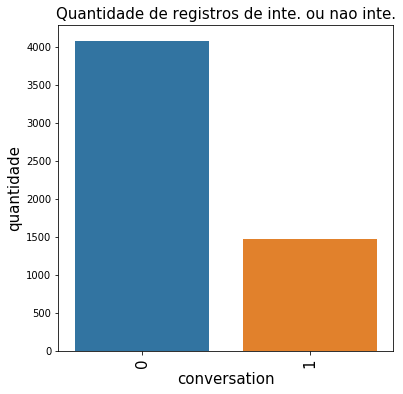

In [18]:
f, ax = plt.subplots(figsize=(6, 6))
plt.xticks(rotation='90')
sns.barplot(x=df_train['conversation'], y=df_train['quantidade'])
plt.xlabel('conversation', fontsize=15)
plt.ylabel('quantidade', fontsize=15)
plt.title('Quantidade de registros de inte. ou nao inte.', fontsize=15)
plt.xticks(rotation='90',fontsize=15)


### Mostrar a quantidade de interações e não interações para todos os usuarios

In [19]:
sql='''select 
    conversation, 
    count(1) as 'quantidade'
from social
group by conversation
'''.format(usuario_padrao)
df_train=pd.read_sql_query(sql, conn)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

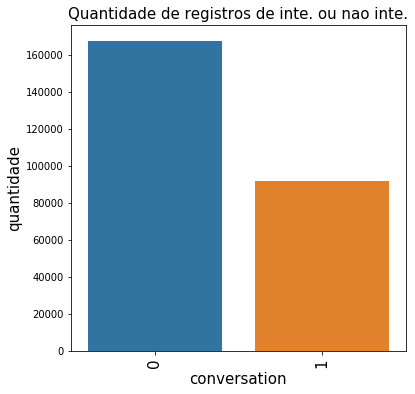

In [20]:
f, ax = plt.subplots(figsize=(6, 6))
plt.xticks(rotation='90')
sns.barplot(x=df_train['conversation'], y=df_train['quantidade'])
plt.xlabel('conversation', fontsize=15)
plt.ylabel('quantidade', fontsize=15)
plt.title('Quantidade de registros de inte. ou nao inte.', fontsize=15)
plt.xticks(rotation='90',fontsize=15)


### Mostra informações dos dias da semana que contem a menor quantidade de registros para o usuario padrao

In [129]:
sql='''select 
    dayWeek, 
    count(1) as 'quantidade'
from social
where conversation=1 and user={}
group by dayWeek
order by dayWeek
'''.format(usuario_padrao)

df_train=pd.read_sql_query(sql, conn)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

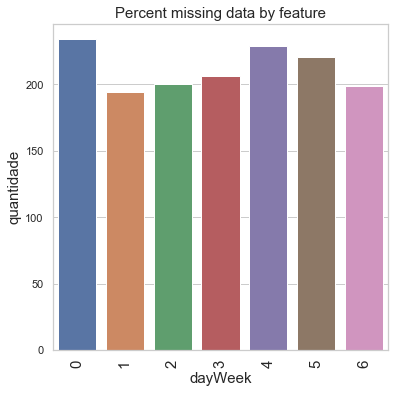

In [133]:
f, ax = plt.subplots(figsize=(6, 6))
plt.xticks(rotation='90')
sns.barplot(x=df_train['dayWeek'], y=df_train['quantidade'])
plt.xlabel('dayWeek', fontsize=15)
plt.ylabel('quantidade', fontsize=15)
plt.title('Quantidade de conversas por dia da semana', fontsize=15)
plt.xticks(rotation='90',fontsize=15)


### Mostra informações dos dias da semana que contem a menor quantidade de registros para todos os usuarios

In [21]:
sql='''select 
    dayWeek, 
    count(1) as 'quantidade'
from social
where conversation=1
group by dayWeek
order by dayWeek
'''.format(usuario_padrao)

df_train=pd.read_sql_query(sql, conn)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

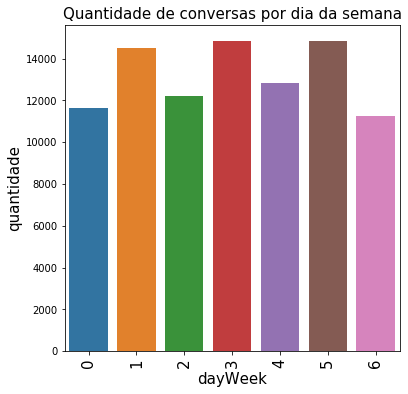

In [22]:
f, ax = plt.subplots(figsize=(6, 6))
plt.xticks(rotation='90')
sns.barplot(x=df_train['dayWeek'], y=df_train['quantidade'])
plt.xlabel('dayWeek', fontsize=15)
plt.ylabel('quantidade', fontsize=15)
plt.title('Quantidade de conversas por dia da semana', fontsize=15)
plt.xticks(rotation='90',fontsize=15)


### Interações sociais durante a semana e no fim de semana do usuario padrao

In [10]:
sql='''select 
    weekend, 
    count(1) as 'quantidade', 
    CASE WHEN weekend=0 
       THEN count(1)/5
       ELSE count(1)/2
       END as 'por dia'

from social
where conversation=1 and user={}
group by weekend
order by weekend
'''.format(23)
pd.read_sql_query(sql, conn)

,weekend,quantidade,por dia
0,0,1069,213
1,1,386,193


### Interações sociais durante a semana e no fim de semana para todos os usuarios

In [23]:
sql='''select 
    weekend, 
    count(1) as 'quantidade', 
    CASE WHEN weekend=0 
       THEN count(1)/5
       ELSE count(1)/2
       END as 'por dia'

from social
where conversation=1
group by weekend
order by weekend
'''.format(23)
pd.read_sql_query(sql, conn)

,weekend,quantidade,por dia
0,0,69247,13849
1,1,22873,11436


In [139]:
sql='''select 
    s.slot as 'slot', 
    slot/4 as 'hora', 
    sum(s.conversation) as 'quantidade',
    sum(s.conversation-1)*-1 as 'nao'
from social as s
where s.user={}
group by s.slot
order by s.slot
'''.format(23)
df_train=pd.read_sql_query(sql, conn)

In [140]:
df_train

,slot,hora,quantidade,nao
0,0,0,2,56
1,1,0,2,56
2,2,0,1,57
3,3,0,1,57
4,4,1,2,56
5,5,1,0,58
6,6,1,0,58
7,7,1,0,58
8,8,2,0,58
9,9,2,0,58


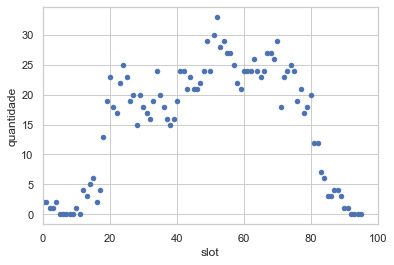

In [141]:
data = pd.concat([df_train['slot'], df_train['quantidade']], axis=1)
data.plot.scatter(x='slot', y='quantidade', xlim=(0,100));

In [142]:
#sns.set()
#cols = ['slot','quantidade']
#sns.pairplot(df_train[cols], size = 10)
#plt.show()

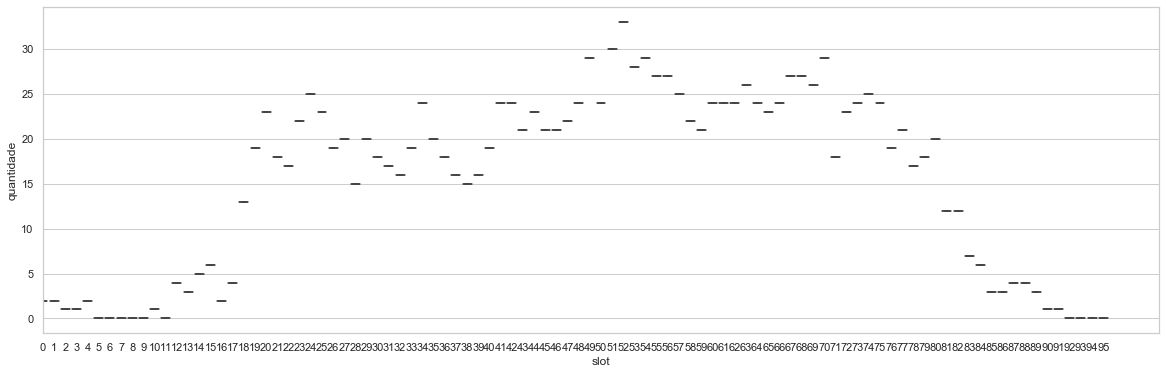

In [143]:
data = pd.concat([df_train['slot'], df_train['quantidade']], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x='slot', y="quantidade", data=data)
fig.axis(xmin=0, xmax=100);

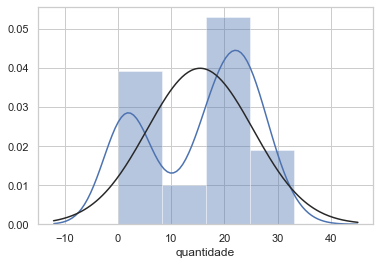

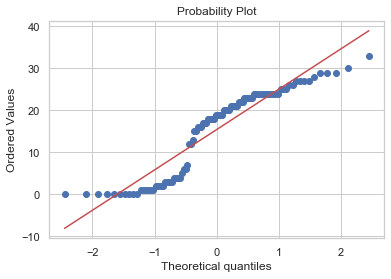

In [144]:
sns.distplot(df_train['quantidade'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['quantidade'], plot=plt)

### Informação sobre as interações sociais do usuário padrao
azul: interação
vermelho: innatividade

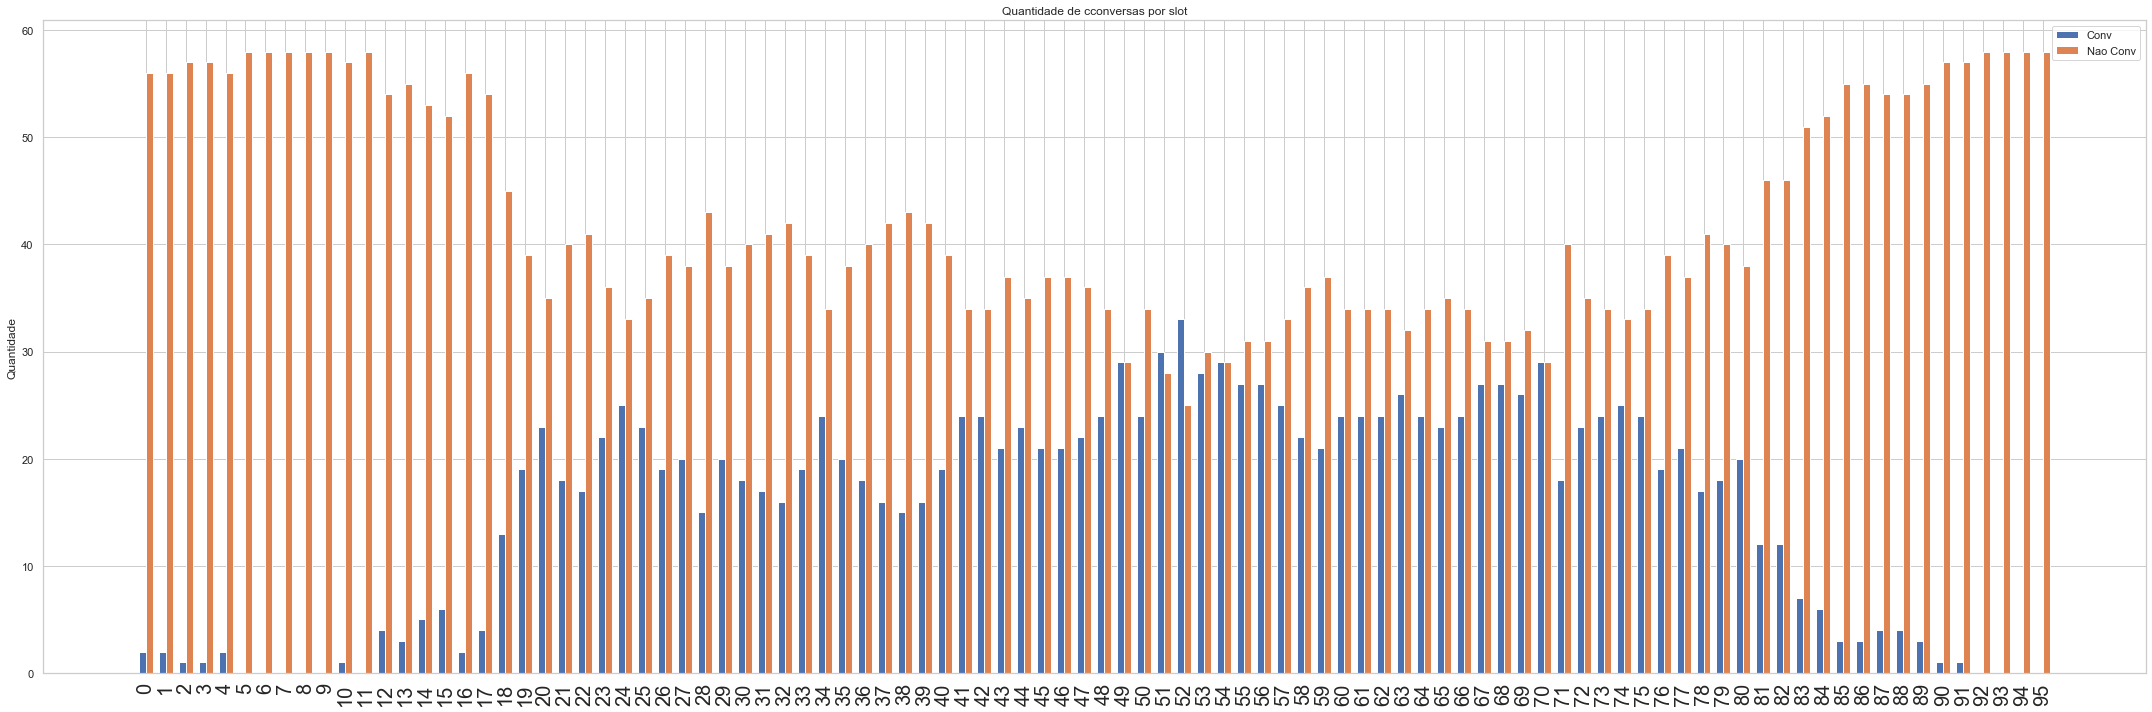

In [145]:
width = 0.35  # the width of the bars

x = np.arange(len(df_train['slot']))  # the label locations

fig, ax = plt.subplots(figsize=(30, 10))
rects1 = ax.bar(x - width/2, df_train['quantidade'], width, label='Conv')
rects2 = ax.bar(x + width/2, df_train['nao'], width, label='Nao Conv')

ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de cconversas por slot')
ax.set_xticks(x)
ax.set_xticklabels(df_train['slot'])
ax.legend()
plt.xticks(rotation='90',fontsize=20)


fig.tight_layout()

plt.show()

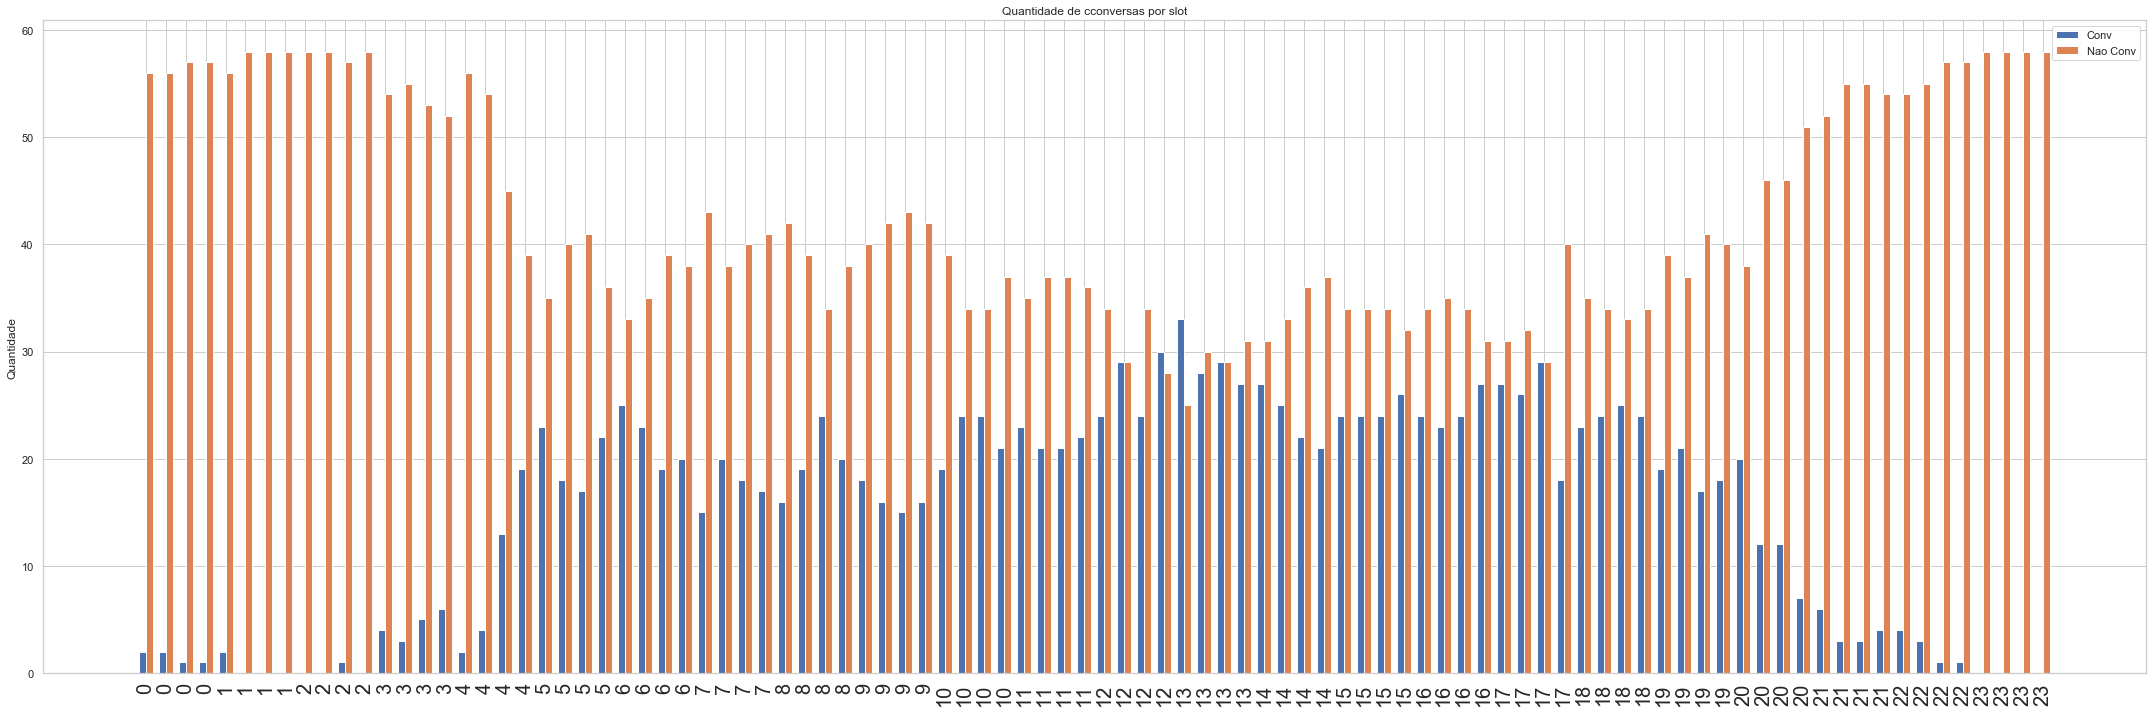

In [146]:
width = 0.35  # the width of the bars

x = np.arange(len(df_train['hora']))  # the label locations

fig, ax = plt.subplots(figsize=(30, 10))
rects1 = ax.bar(x - width/2, df_train['quantidade'], width, label='Conv')
rects2 = ax.bar(x + width/2, df_train['nao'], width, label='Nao Conv')

ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de cconversas por slot')
ax.set_xticks(x)
ax.set_xticklabels(df_train['hora'])
ax.legend()
plt.xticks(rotation='90',fontsize=20)



fig.tight_layout()

plt.show()

### Informações sobre registro de conversação de todos os usuários por **slots**

In [4]:
sql='''select 
    slot, 
    count(1) as 'quantidade'
from social
where conversation=1
group by slot
order by slot
'''
df_train=pd.read_sql_query(sql, conn)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 <a list of 96 Text xticklabel objects>)

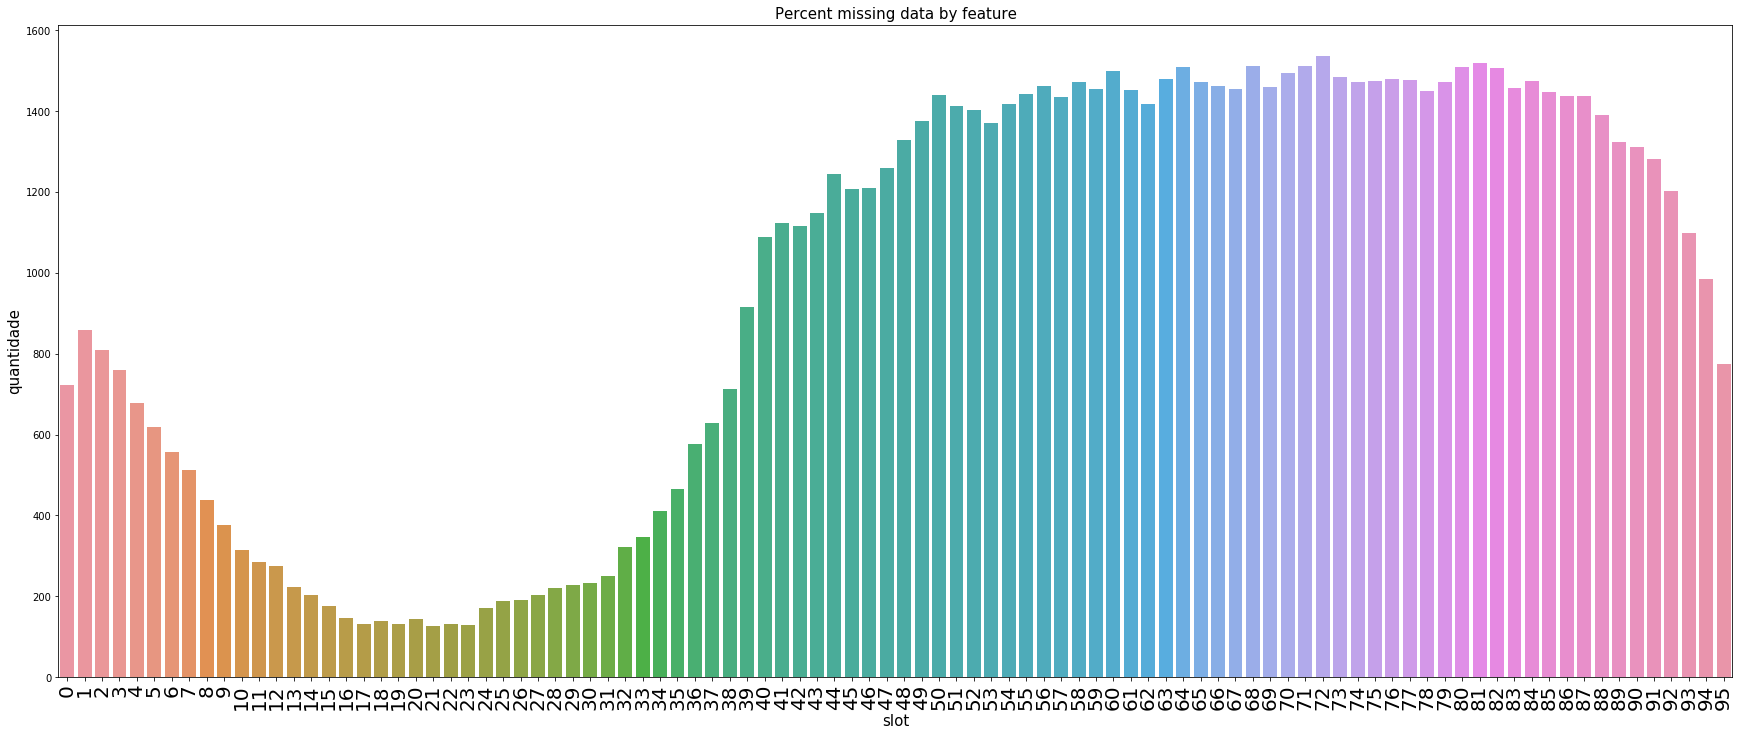

In [5]:
f, ax = plt.subplots(figsize=(30, 12))
plt.xticks(rotation='180')
sns.barplot(x=df_train['slot'], y=df_train['quantidade'])
plt.xlabel('slot', fontsize=15)
plt.ylabel('quantidade', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.xticks(rotation='90',fontsize=20)


## Informação sobre conversação durante os dia uteis: segunda a sexta

In [151]:
sql='''select 
    slot/4 as 'slot', 
    count(1) as 'quantidade'
from social
where conversation=1 and weekend=0
group by slot/4
order by slot/4
'''
df_train=pd.read_sql_query(sql, conn)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

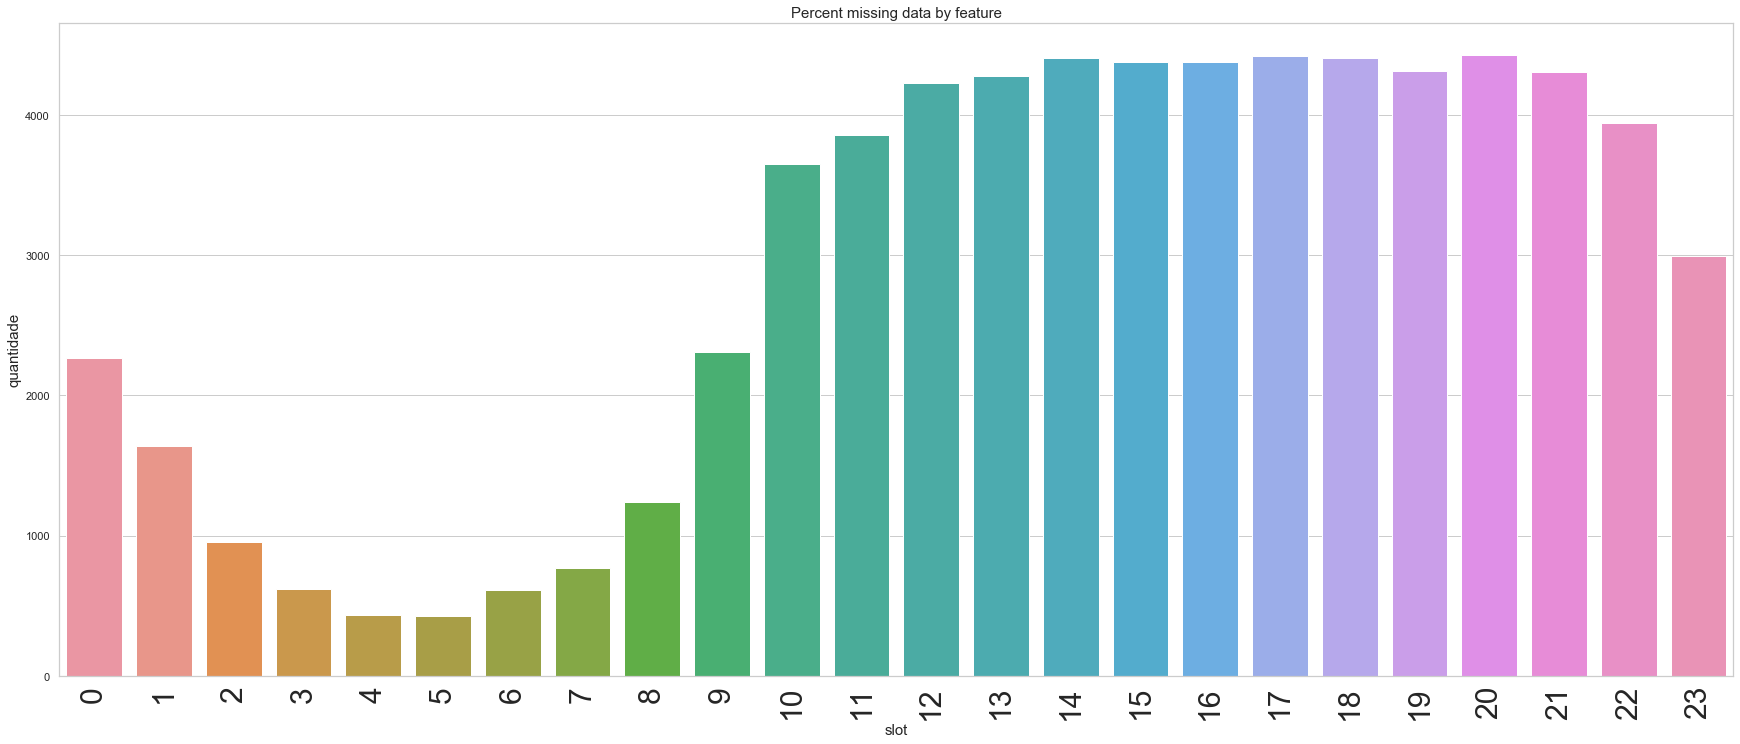

In [152]:
f, ax = plt.subplots(figsize=(30, 12))
plt.xticks(rotation='90')
sns.barplot(x=df_train['slot'], y=df_train['quantidade'])
plt.xlabel('slot', fontsize=15)
plt.ylabel('quantidade', fontsize=15)
plt.title('Dias uteis', fontsize=15)
plt.xticks(rotation='90',fontsize=30)


### Análise do final de semana : sabado e domingo

In [153]:
sql='''select 
slot/4 as 'slot', 
count(1) as 'quantidade'
from social
where conversation=1 and weekend=1
group by slot/4
order by slot/4
'''
df_train=pd.read_sql_query(sql, conn)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

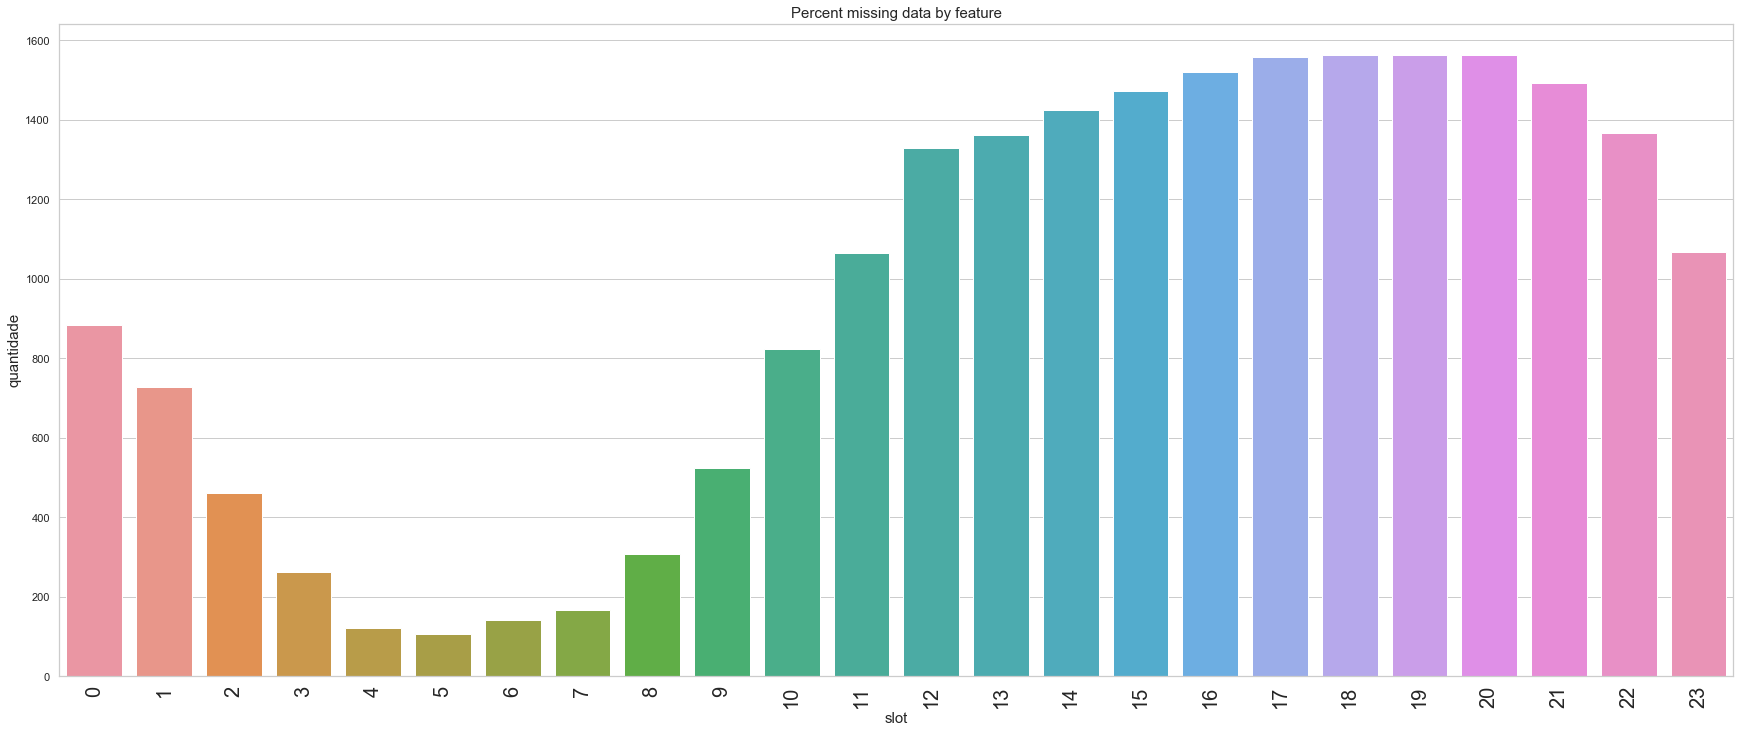

In [154]:
f, ax = plt.subplots(figsize=(30, 12))
plt.xticks(rotation='90')
sns.barplot(x=df_train['slot'], y=df_train['quantidade'])
plt.xlabel('slot', fontsize=15)
plt.ylabel('quantidade', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.xticks(rotation='90',fontsize=20)


#### Verifica quantos registros de conversação existem por usuários

In [155]:
sql='''select 
    user, 
    count(1) as quantidade
from social 
where conversation=1
group by user
order by count(1)
'''
df_train=pd.read_sql_query(sql, conn)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text yticklabel objects>)

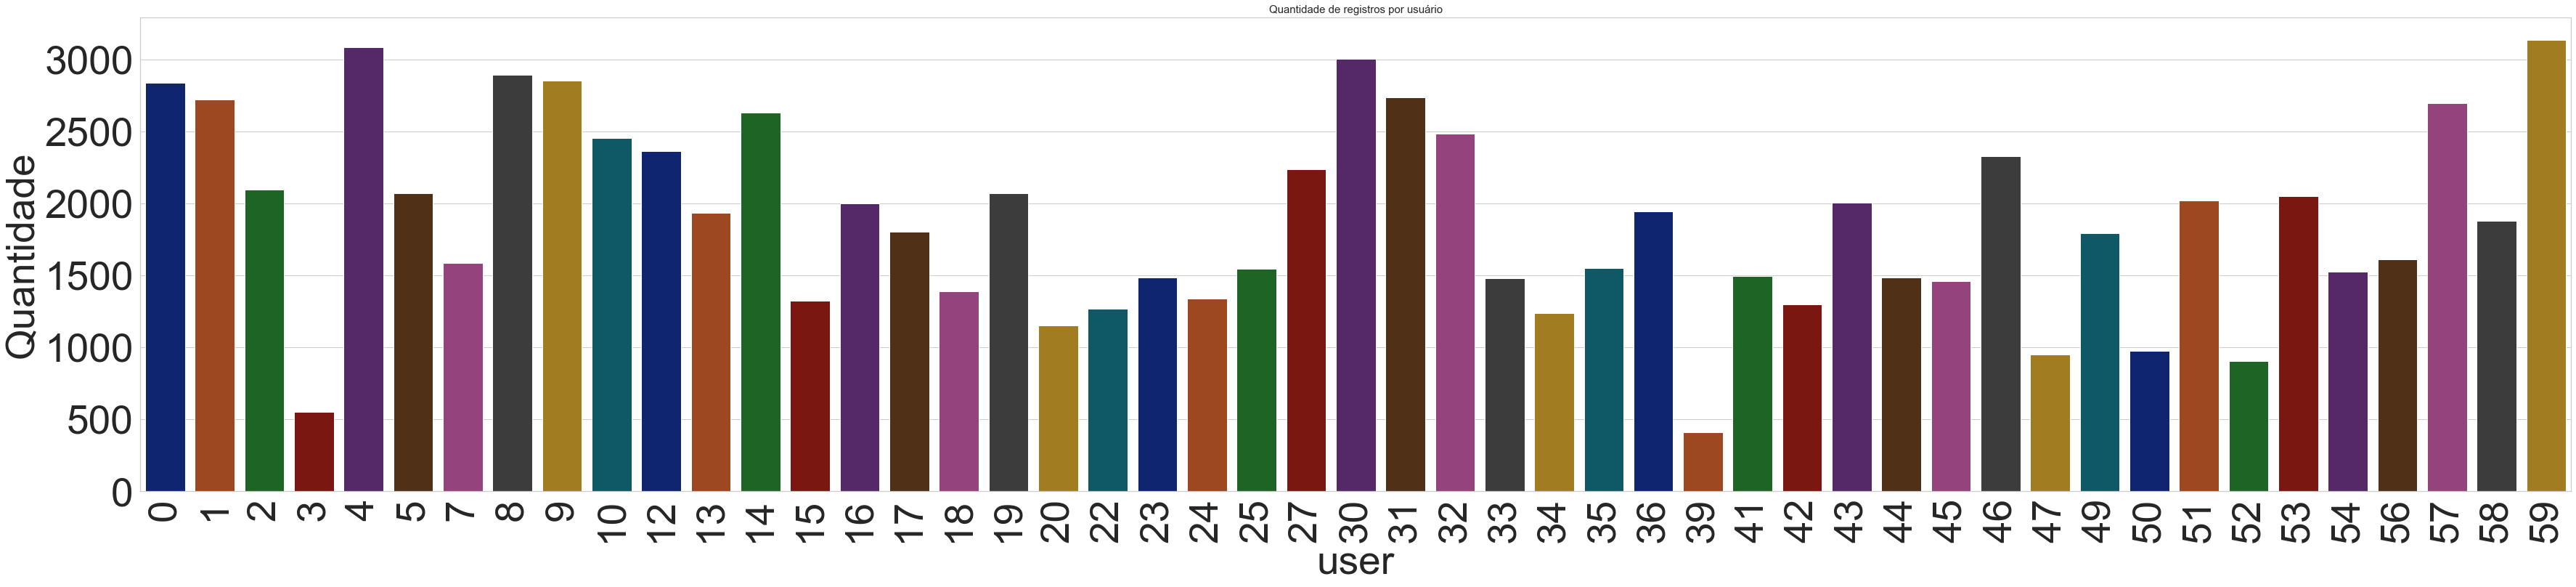

In [156]:
f, ax = plt.subplots(figsize=(60, 12))
sns.set(style="whitegrid")

plt.xticks(rotation='90')
sns.barplot(x=df_train['user'], y=df_train['quantidade'], palette='dark')
plt.xlabel('user', fontsize=55)
plt.ylabel('Quantidade', fontsize=55)
plt.title('Quantidade de registros por usuário', fontsize=15)
plt.xticks(rotation='90',fontsize=55)
plt.yticks(fontsize=55)

In [157]:
#f, ax = plt.subplots(figsize=(60, 12))
#sns.catplot(y="quantidade", x="user",
#            palette="pastel", edgecolor=".6",
#            data=df_train);
#plt.xticks(rotation='90',fontsize=20)


### Similariadade do usuario padrão com os outros usuarios

In [159]:
sql='''select 
s2.user as 'user', 
count(1) as 'iguais'
from social as s1 inner join social as s2 on s1.day=s2.day and s1.month = s2.month and s1.slot=s2.slot
where s1.user={} and s1.conversation=s2.conversation
group by s2.user
order by count(1)
'''.format(23)
df_train=pd.read_sql_query(sql, conn)

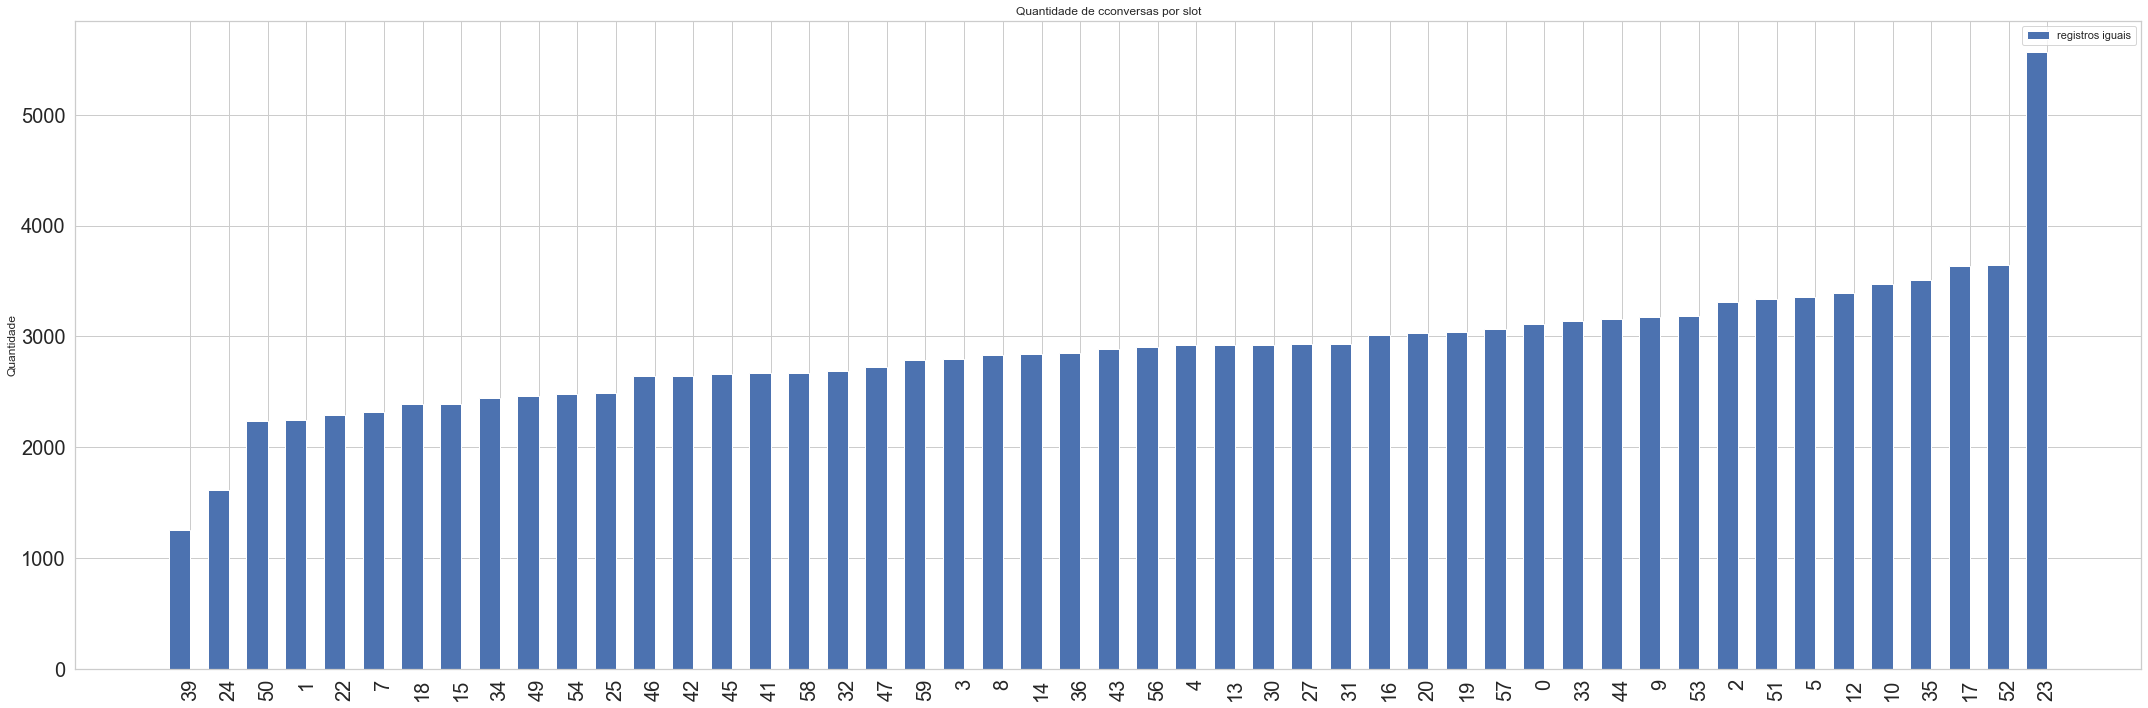

In [160]:
df_train

width = 0.55  # the width of the bars

x = np.arange(len(df_train['user']))  # the label locations

fig, ax = plt.subplots(figsize=(30, 10))
rects1 = ax.bar(x - width/2, df_train['iguais'], width, label='registros iguais')

ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de cconversas por slot')
ax.set_xticks(x)
ax.set_xticklabels(df_train['user'])
ax.legend()
plt.xticks(rotation='90',fontsize=20)
plt.yticks(fontsize=20)

fig.tight_layout()

plt.show()

## Verifica quais dias possuem  registros do usuario

In [97]:
user=24

In [98]:
sql='''select distinct 
    month,
    day 
from social where user={}
'''.format(user)
df_train=pd.read_sql_query(sql, conn)
print(df_train)

    month  day
0       3   27
1       3   28
2       3   29
3       3   30
4       3   31
5       4    1
6       4    2
7       4    3
8       4    4
9       4    5
10      4    6
11      4    7
12      4    8
13      4    9
14      4   10
15      4   11
16      4   12
17      4   13
18      4   14
19      4   15
20      4   16
21      4   17
22      4   18
23      4   19
24      4   20
25      4   21
26      4   22
27      4   23
28      4   24
29      4   25
30      4   26


### Informações do usuario com compartamento mais distinto 

In [99]:
sql='''select 
    s.slot as 'slot', 
    slot/4 as 'hora', 
sum(s.conversation) as 'quantidade',
sum(s.conversation-1)*-1 as 'nao'
from social as s
where s.user={}
group by s.slot
order by s.slot
'''.format(user)
df_train=pd.read_sql_query(sql, conn)



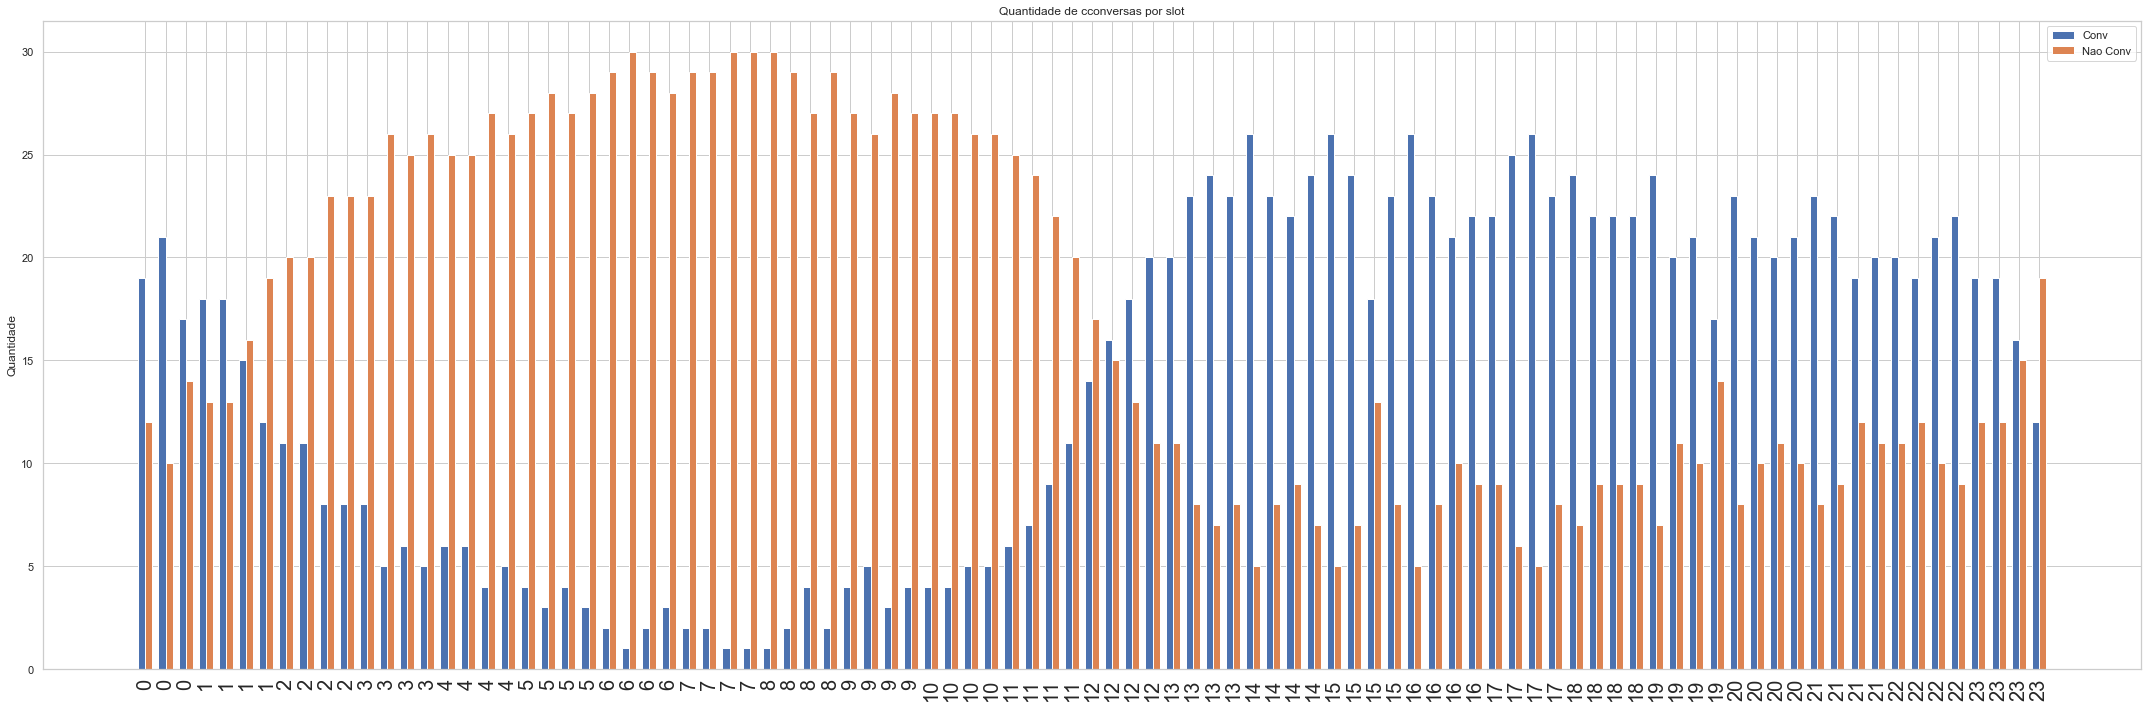

In [100]:
width = 0.35  # the width of the bars

x = np.arange(len(df_train['hora']))  # the label locations

fig, ax = plt.subplots(figsize=(30, 10))
rects1 = ax.bar(x - width/2, df_train['quantidade'], width, label='Conv')
rects2 = ax.bar(x + width/2, df_train['nao'], width, label='Nao Conv')

ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de cconversas por slot')
ax.set_xticks(x)
ax.set_xticklabels(df_train['hora'])
ax.legend()
plt.xticks(rotation='90',fontsize=20)



fig.tight_layout()

plt.show()

### Informações do usuario 1

In [122]:
sql='''select s.slot as 'slot', 
sum(s.conversation) as 'quantidade',
sum(s.conversation-1)*-1 as 'nao'
from social as s
where s.user=39
group by s.slot
order by s.slot
'''
df_train=pd.read_sql_query(sql, conn)

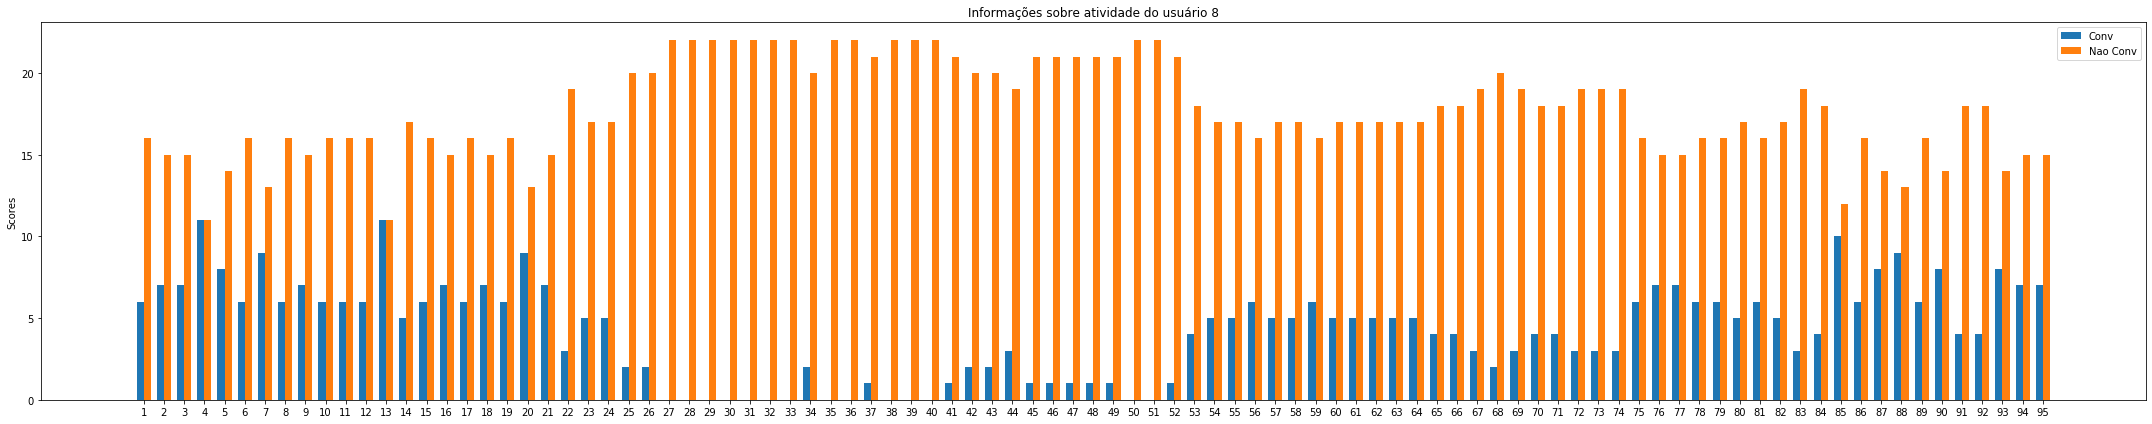

In [123]:
width = 0.35  # the width of the bars

x = np.arange(len(df_train['slot']))  # the label locations

fig, ax = plt.subplots(figsize=(30, 6))
rects1 = ax.bar(x - width/2, df_train['quantidade'], width, label='Conv')
rects2 = ax.bar(x + width/2, df_train['nao'], width, label='Nao Conv')

ax.set_ylabel('Scores')
ax.set_title('Informações sobre atividade do usuário 8')
ax.set_xticks(x)
ax.set_xticklabels(df_train['slot'])
ax.legend()

fig.tight_layout()

plt.show()

In [133]:
sql='''select s.slot as 'slot', 
sum(s.conversation) as 'quantidade',
sum(s.conversation-1)*-1 as 'nao'
from social as s
where s.user=50
group by s.slot
order by s.slot
'''
df_train=pd.read_sql_query(sql, conn)

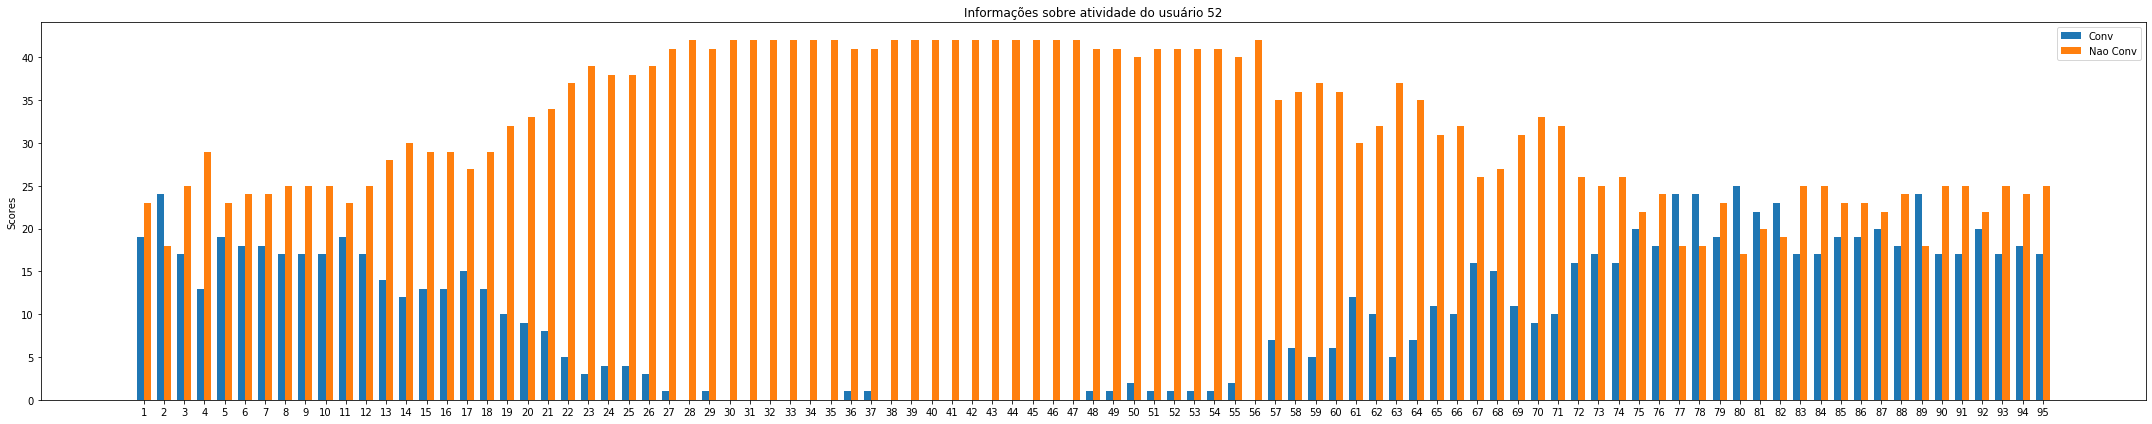

In [134]:
width = 0.35  # the width of the bars

x = np.arange(len(df_train['slot']))  # the label locations

fig, ax = plt.subplots(figsize=(30, 6))
rects1 = ax.bar(x - width/2, df_train['quantidade'], width, label='Conv')
rects2 = ax.bar(x + width/2, df_train['nao'], width, label='Nao Conv')

ax.set_ylabel('Scores')
ax.set_title('Informações sobre atividade do usuário 52')
ax.set_xticks(x)
ax.set_xticklabels(df_train['slot'])
ax.legend()

fig.tight_layout()

plt.show()

In [47]:
sql='''select 
user,
count(distinct month||"-"|| day) as 'quant dias'
from social 
group by user
order by count(distinct month||"-"|| day) 
'''
df_train=pd.read_sql_query(sql, conn)

In [48]:
df_train

,user,quant dias
0,39,22
1,24,31
2,50,42
3,3,44
4,34,44
5,7,45
6,18,45
7,22,46
8,54,46
9,15,47


## Analise do desvio padrão

In [29]:
sql='''select 
s.dayweek as 'dayweek', 
sum(s.conversation) as 'quantidade'
from social as s
where s.user=23 and s.conversation=1
group by s.dayweek
order by s.slot
'''
df_train=pd.read_sql_query(sql, conn)

In [30]:
df_train

,dayweek,quantidade
0,6,199
1,2,200
2,4,229
3,1,194
4,0,234
5,5,221
6,3,206
